# 1. Google drive Mount

In [215]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 2. Define Directory

In [219]:
# 사용하기 전 변경해주어야 하는 파라미터
BASE_WORKING_DIR = "/content/gdrive/My Drive/weather_bigcontest/4_code/"
# BASE_WORKING_DIR = "/content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/"
USERNAME = "park"

In [220]:
import os
# 사용하는 디렉토리 정의
DATA_BASE_PATH = os.path.join(BASE_WORKING_DIR, "data")
DATA_RAW_PATH = os.path.join(DATA_BASE_PATH, "raw")
DATA_EXPORT_PATH = os.path.join(DATA_BASE_PATH, "export")
DATA_CONV_USER_PATH = os.path.join(DATA_BASE_PATH, USERNAME)
DATA_CONV_PATH = os.path.join(DATA_BASE_PATH, "converted")
MODEL_PATH = os.path.join(BASE_WORKING_DIR, "model")
RESULT_PATH = os.path.join(BASE_WORKING_DIR, "result")

WORKING_DIR = os.path.join(BASE_WORKING_DIR, USERNAME)

print('Current Work Directory :',  os.getcwd(), '\n')
print('Username :',  USERNAME, '\n')

print("DATA_BASE_PATH : ", DATA_BASE_PATH)
print("DATA_RAW_PATH : ", DATA_RAW_PATH)
print("DATA_EXPORT_PATH : ", DATA_EXPORT_PATH)
print("DATA_CONV_USER_PATH : ", DATA_CONV_USER_PATH)
print("DATA_CONV_PATH : ", DATA_CONV_PATH)

print("MODEL_PATH : ", MODEL_PATH)

print("RESULT_PATH : ", RESULT_PATH)

print("WORKING_DIR : ", WORKING_DIR)


Current Work Directory : /content 

Username : park 

DATA_BASE_PATH :  /content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/data
DATA_RAW_PATH :  /content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/data/raw
DATA_EXPORT_PATH :  /content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/data/export
DATA_CONV_USER_PATH :  /content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/data/park
DATA_CONV_PATH :  /content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/data/converted
MODEL_PATH :  /content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/model
RESULT_PATH :  /content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/result
WORKING_DIR :  /content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/park


In [221]:
# 데이터 무엇이 있는지 확인하자.
# 아래 코드를 수행하게 되면, "../input/"에서 리눅스 명령어 "ls"를 수행한 결과를 보여주게 된다. 이 때 나온 binary code를 "utf8"로 디코딩해서 보여준다.
from subprocess import check_output
print("===== Raw Data List =====\n", check_output(["ls", DATA_RAW_PATH]).decode("utf8"))
print("===== Export Data List =====\n" ,check_output(["ls", DATA_EXPORT_PATH]).decode("utf8"))
print("===== Converted User Data List =====\n" ,check_output(["ls", DATA_CONV_USER_PATH]).decode("utf8"))
print("===== Converted Data List =====\n" ,check_output(["ls", DATA_CONV_PATH]).decode("utf8"))
print("===== Model List =====\n" ,check_output(["ls", MODEL_PATH]).decode("utf8"))
print("===== Result file List =====\n" ,check_output(["ls", RESULT_PATH]).decode("utf8"))

===== Raw Data List =====
 plant1_train.csv
plant2_train.csv
plant2_train.gsheet
plant_test.csv
submit.csv
submit.gsheet

===== Export Data List =====
 dangjin_aws
seosan_asos
sinpyeong_aws
songak_forecast
songak_local
songsan_forecast
songsan_local

===== Converted User Data List =====
 backup_0.96model
data_all.csv
data_all_out.csv
data_all_out_in.csv
date_trend.csv
date_trend_point.csv
ExtraTreesClassifier_th_10.csv
GradientBoostingClassifier_all_feature_th_40.csv
lastplus_th_10.csv
last_th_08.csv
last_th_10.csv
model
model_cond_all.pkl
model_cond_all_plus_.pkl
model_hum_in.pkl
model_hum_out_loc.pkl
model_tem_coil.pkl
model_tem_in.pkl
model_tem_out_loc.pkl
plant1_by_loc.csv
plant1_by_loc.gsheet
plant2_by_loc.csv
plant_test_all_weather_feature_add_cluster_add_out.csv
plant_test_all_weather_feature_add_cluster_add_out_in.csv
plant_test_all_weather_feature_add_cluster_add_out_in.gsheet
plant_train_all_weather_feature_add_cluster.csv
predict.csv
RandomForestClassifier_th_10.csv
result.c

# 4. Import Library

In [222]:
# 기본 데이터 라이브러리 로드
import sys # 시스템 파라미터에 접근할 수 있게 도와준다.
print("Python version: {}". format(sys.version))

import pandas as pd # 데이터 정제에 도움을 주는 라이브러리
print("pandas version: {}". format(pd.__version__))

import matplotlib # 매트랩에서 사용하는 시각화 도구를 사용할 수 있게 도와주는 시각화 도구
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np # 행렬 계산을 위해 필요한 라이브러리
print("NumPy version: {}". format(np.__version__))

import scipy as sp # 수학 관련 함수가 내장된 라이브러리
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display # 주피터 노트북에서 예쁘게 시각화 해주는 도구
print("IPython version: {}". format(IPython.__version__)) 

import sklearn # 각종 통계 도구와 머신 러닝 알고리즘이 내장되어 있는 라이브러리
print("scikit-learn version: {}". format(sklearn.__version__))

# 파이썬 내장 라이브러리
import random
import time
import os
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import copy


# Jupyter Notebook 이나 ipython 을 사용하다보면 향후 버전이 올라갈 때 변경될 사항 등을 알려주는 경고 메시지(warning message)를 뜨지 않게 해준다.
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
pandas version: 1.0.5
matplotlib version: 3.2.2
NumPy version: 1.18.5
SciPy version: 1.4.1
IPython version: 5.5.0
scikit-learn version: 0.22.2.post1
-------------------------


In [223]:
# 모델링 라이브러리, 수학 계산 툴 로드
# 일반적인 모델링 라이브러리
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 

# 모델링 시 헬퍼 함수들
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# interpolation 함수
import scipy.interpolate as spi

# model load
import pickle
from sklearn.externals import joblib

# 시각화 도구
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# 시각화 도구 default 세팅
# 주피터 노트북에서 plot 결과를 볼 수 있게 해준다.
%matplotlib inline
mpl.style.use('ggplot') # matplotlib에서 plot되는 결과를 선택할 수 있다.
sns.set_style('white') # seaborn에서 사용할 style을 설정할 수 있다.
pylab.rcParams['figure.figsize'] = 12,8 # plot의 크기와 선 등의 기본 값을 설정할 수 있다.

# 시각화 Style 설정하기
# print(plt.style.available)
# ['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']

sns.set();
plt.style.use(['fivethirtyeight'])
sns.set_style('darkgrid')

# 5. Get the Data

## 1. plant data 가져오기

In [224]:
# plant 데이터 
data_train = pd.read_csv(os.path.join(DATA_CONV_PATH, "plant_train_all_weather_feature_add_cluster.csv"))

# unnamed: 0 제거
data_train.drop(['Unnamed: 0'], axis='columns', inplace=True)

# date 변수 str -> datetime.date()
data_train['date'] = data_train['date'].apply(lambda x : datetime.strptime(x + " 00:00:00", '%Y-%m-%d %H:%M:%S').date()) 

In [225]:
# train 데이터 info
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350366 entries, 0 to 350365
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mea_ddhr               350366 non-null  object 
 1   plant                  350366 non-null  float64
 2   loc                    350366 non-null  float64
 3   tem_in                 350366 non-null  float64
 4   hum_in                 350366 non-null  float64
 5   tem_coil               350366 non-null  float64
 6   tem_out_loc            350366 non-null  float64
 7   hum_out_loc            350366 non-null  float64
 8   cond_loc               350366 non-null  float64
 9   date                   350366 non-null  object 
 10  time                   350366 non-null  float64
 11  dangjin-ta             350366 non-null  float64
 12  dangjin-hm             350366 non-null  float64
 13  dangjin-ws             350366 non-null  float64
 14  dangjin-rn             350366 non-nu

In [226]:
# train 데이터 NULL 제거 후 info
data_train.dropna(inplace=True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350366 entries, 0 to 350365
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mea_ddhr               350366 non-null  object 
 1   plant                  350366 non-null  float64
 2   loc                    350366 non-null  float64
 3   tem_in                 350366 non-null  float64
 4   hum_in                 350366 non-null  float64
 5   tem_coil               350366 non-null  float64
 6   tem_out_loc            350366 non-null  float64
 7   hum_out_loc            350366 non-null  float64
 8   cond_loc               350366 non-null  float64
 9   date                   350366 non-null  object 
 10  time                   350366 non-null  float64
 11  dangjin-ta             350366 non-null  float64
 12  dangjin-hm             350366 non-null  float64
 13  dangjin-ws             350366 non-null  float64
 14  dangjin-rn             350366 non-nu

# 5. Cluster 특징 살펴보기

## 1. 월 feature 만들기

In [227]:
data_train["month"] = data_train["date"].apply(lambda x: x.month)

In [228]:
data_train

mea_ddhr  plant  ...  seosan-ground-changed  month
0       2016-04-01 00:00:00    1.0  ...              44.577377      4
1       2016-04-01 00:00:00    1.0  ...              44.577377      4
2       2016-04-01 00:00:00    1.0  ...              44.577377      4
3       2016-04-01 03:00:00    1.0  ...              44.577377      4
4       2016-04-01 03:00:00    1.0  ...              44.577377      4
...                     ...    ...  ...                    ...    ...
350361  2019-03-31 23:30:00    2.0  ...              17.498498      3
350362  2019-03-31 23:30:00    2.0  ...              17.498498      3
350363  2019-03-31 23:40:00    2.0  ...              17.498498      3
350364  2019-03-31 23:40:00    2.0  ...              17.498498      3
350365  2019-03-31 23:40:00    2.0  ...              17.498498      3

[350366 rows x 49 columns]

## 2. 월별 row 개수 파악하기

In [229]:
# def rowsPlot(col):
#   # 폰트지정
#   font1 = {'family': 'Liberation Mono', 'size': 24, 
#           'color':  'black'}
#   font2 = {'family': 'Liberation Sans', 'size': 12, 'weight': 'light',
#           'color':  'black'}
#   font3 = {'family': 'Liberation Sans', 'size': 12, 'weight': 'light',
#           'color':  'black'}
#   grouped = data_train[f'{col}'].groupby(data_train["month"])
#   month_count_list = grouped.count()
#   month_count_list = list(month_count_list)

#   x = grouped.count().index
#   y = grouped.count()

#   plt.title(f'Number of rows corresponding to the month {col}', fontdict=font1)
#   plt.plot(x, y, c="b",
#           lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
#   plt.xlabel("month")
#   plt.ylabel("counts")
#   plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
#   plt.show()

In [230]:
# 폰트지정
font1 = {'family': 'Liberation Mono', 'size': 24, 
         'color':  'black'}
font2 = {'family': 'Liberation Sans', 'size': 12, 'weight': 'light',
         'color':  'black'}
font3 = {'family': 'Liberation Sans', 'size': 12, 'weight': 'light',
         'color':  'black'}

In [231]:
# grouped = data_train["tem_in"].groupby(data_train["month"])
grouped = data_train["seosan-ta"].groupby(data_train["month"])
month_count_list = grouped.count()
month_count_list = list(month_count_list)

x = grouped.count().index
y = grouped.count()

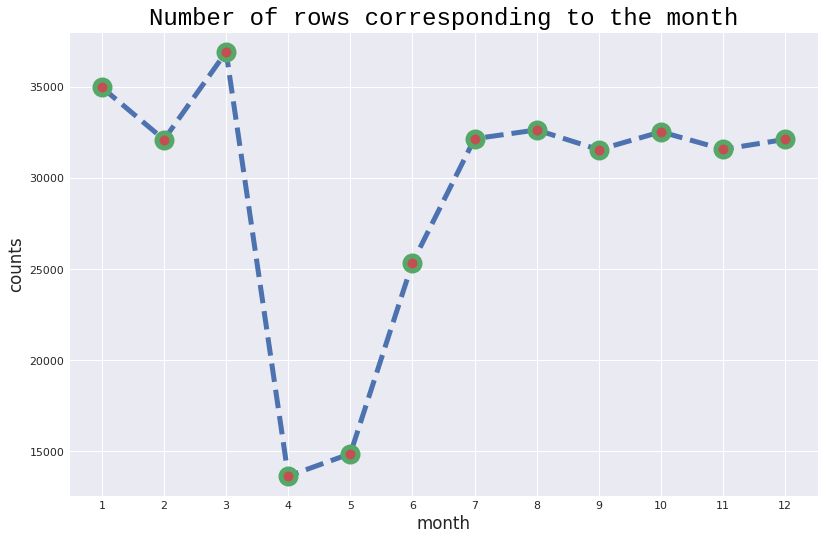

In [232]:
plt.title("Number of rows corresponding to the month", fontdict=font1)
plt.plot(x, y, c="b",
         lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.xlabel("month")
plt.ylabel("counts")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.show()

## 3. Trend Cluster 분류 확인하기

In [233]:
import matplotlib.pyplot as plt
def clusterMonthPlot(name, col, k):
  grouped = data_train[col].groupby(data_train["month"])
  month_count_list = grouped.count()
  month_count_list = list(month_count_list)

  width = 2
  if k%2 == 1:
    width = 3


  colorListGlobal = ["r", "b", "g", "y", "m"]
  markerColorListGlobal = ["m", "g", "b", "r", "y"]
  groupedList = []
  axisList = list(range(1, k+1))
  colorList = colorListGlobal[0:k]
  markerColorList = markerColorListGlobal[0:k]

  for i in range(k):
    data_cluster = data_train[data_train[f'{col}-{name}'] == i]
    groupedList.append(data_cluster[col].groupby(data_cluster["month"]))
    
  fig = plt.figure(figsize=(10,8))
  plt.suptitle(f'{name} Propability of rows corresponding to the month {col}', fontdict=font1)
  for a, g, c, m in zip(axisList, groupedList, colorList, markerColorList):
    index = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    value = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    # print(g.count().index)
    for mon, val in zip(g.count().index, g.count()):
      idx = int(mon-1)
      value[idx] = val/month_count_list[idx]

    plt.subplot(2,width,a)
    plt.subplots_adjust(bottom = 0.1, hspace = 0.4)
    plt.title(f'{a}-cluster')
    plt.plot(index, value, c=f'{c}',
            lw=5, ls="--", marker="o", ms=5, mec="g", mew=5, mfc=f'{m}')
    plt.xlabel("month")
    # plt.ylabel("probability")
    plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    # plt.show()



In [234]:
# data_train_0 = data_train[data_train["seosan-ta-trend"] == 0]
# data_train_1 = data_train[data_train["seosan-ta-trend"] == 1]
# data_train_2 = data_train[data_train["seosan-ta-trend"] == 2]
# data_train_3 = data_train[data_train["seosan-ta-trend"] == 3]
# data_train_4 = data_train[data_train["seosan-ta-trend"] == 4]

In [235]:
# grouped0 = data_train_0["tem_in"].groupby(data_train_0["month"])
# grouped1 = data_train_1["tem_in"].groupby(data_train_1["month"])
# grouped2 = data_train_2["tem_in"].groupby(data_train_2["month"])
# grouped3 = data_train_3["tem_in"].groupby(data_train_3["month"])
# grouped4 = data_train_4["tem_in"].groupby(data_train_4["month"])

# # groupedList = [grouped0, grouped1, grouped2, grouped3, grouped4]
# # axisList = [1, 2, 3, 4, 5]
# # colorList = ["r", "b", "g", "y", "m"]
# # markerColorList = ["m", "g", "b", "r", "y"]

# groupedList = [grouped0, grouped1, grouped2, grouped3]
# axisList = [1, 2, 3, 4]
# colorList = ["r", "b", "g", "y"]
# markerColorList = ["m", "g", "b", "r"]

In [236]:
# import matplotlib.pyplot as plt

# plt.suptitle("Trend Propability of rows corresponding to the month", fontdict=font1)
# for a, g, c, m in zip(axisList, groupedList, colorList, markerColorList):
#   index = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
#   value = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
#   for mon, val in zip(g.count().index, g.count()):
#     idx = mon-1
#     value[idx] = val/month_count_list[idx]
#     # print(idx, val/month_count_list[idx], value[idx])

#   plt.subplot(2,2,a)
#   plt.subplots_adjust(bottom = 0.1, hspace = 0.4)
#   plt.title(f'{a}-cluster')
#   plt.plot(index, value, c=f'{c}',
#           lw=5, ls="--", marker="o", ms=5, mec="g", mew=5, mfc=f'{m}')
#   plt.xlabel("month")
#   plt.ylabel("probability")
#   plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
#   plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
#   # plt.show()



### 1. ta

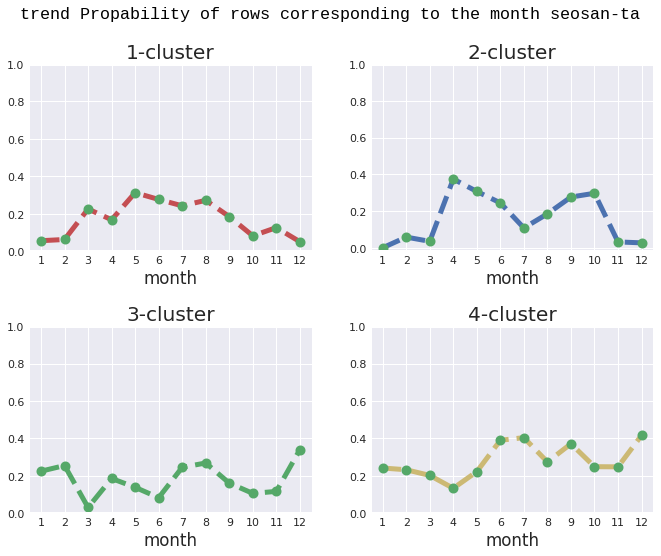

In [237]:
clusterMonthPlot("trend", "seosan-ta", 4)

### 2. hm

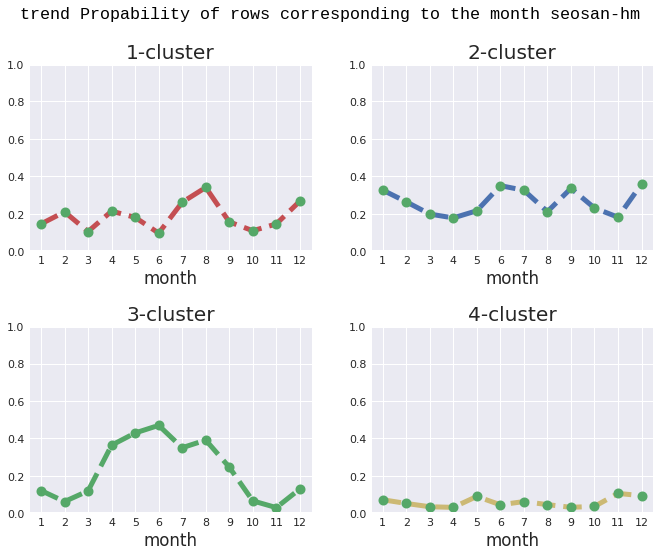

In [238]:
clusterMonthPlot("trend", "seosan-hm", 4)

### 3. ground

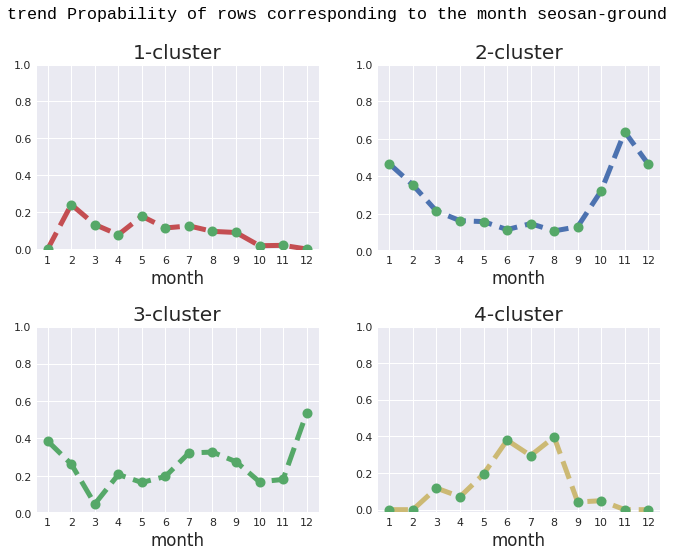

In [239]:
clusterMonthPlot("trend", "seosan-ground", 4)

### 날짜별 보간함수 plot

In [17]:
# interpolation dictionary 설명서를 load 한다.
IPO_DICT_READ_ME = pd.read_csv(os.path.join(MODEL_PATH, "IPO_DICT_READ_ME.csv"))
IPO_DICT_READ_ME = IPO_DICT_READ_ME.fillna(" ")
IPO_DICT_READ_ME

WHERE :                                             dangjin  ... songsan songak
0   TARGET :                                                  ta  ...      ta     ta
1                                                             hm  ...      hm     hm
2                                                             ws  ...      ws     ws
3                                                             rn  ...      rn     rn
4                                                                 ...               
5                                                                 ...               
6                                                                 ...               
7                                                                 ...               
8                                                                 ...               
9                                                                 ...               
10                                                                ...               
11    DATE :                           datetime.date(1995-03-16)  ...               
12   USAGE :   ipo_dict[('dangjin', 'ta', datetime.date(1995-...  ...               

[13 rows x 6 columns]

In [18]:
# 설명서 기반으로 dictionary 만들기
weather_name = IPO_DICT_READ_ME.columns[1:]
weather_cnt = [4, 5, 11, 4, 4]
weather = dict()
idx = 0
for name in weather_name:
  weather[name] = IPO_DICT_READ_ME[name][:weather_cnt[idx]]
  idx += 1
weather.keys()

dict_keys(['dangjin', 'sinpyeong', 'seosan', 'songsan', 'songak'])

In [19]:
# interpolation dictionary 를 load 한다.
import pickle
ipo_dict = joblib.load(os.path.join(MODEL_PATH, "ipo_dict.pkl"))
ipo_dict.keys()

dict_keys([('dangjin', 'ta', datetime.date(2016, 4, 1)), ('dangjin', 'ta', datetime.date(2016, 4, 2)), ('dangjin', 'ta', datetime.date(2016, 4, 3)), ('dangjin', 'ta', datetime.date(2016, 4, 4)), ('dangjin', 'ta', datetime.date(2016, 4, 5)), ('dangjin', 'ta', datetime.date(2016, 4, 6)), ('dangjin', 'ta', datetime.date(2016, 4, 7)), ('dangjin', 'ta', datetime.date(2016, 4, 8)), ('dangjin', 'ta', datetime.date(2016, 4, 9)), ('dangjin', 'ta', datetime.date(2016, 4, 10)), ('dangjin', 'ta', datetime.date(2016, 4, 11)), ('dangjin', 'ta', datetime.date(2016, 4, 12)), ('dangjin', 'ta', datetime.date(2016, 4, 13)), ('dangjin', 'ta', datetime.date(2016, 4, 14)), ('dangjin', 'ta', datetime.date(2016, 4, 15)), ('dangjin', 'ta', datetime.date(2016, 4, 16)), ('dangjin', 'ta', datetime.date(2016, 4, 17)), ('dangjin', 'ta', datetime.date(2016, 4, 18)), ('dangjin', 'ta', datetime.date(2016, 4, 19)), ('dangjin', 'ta', datetime.date(2016, 4, 20)), ('dangjin', 'ta', datetime.date(2016, 4, 21)), ('dangjin',

In [96]:
import matplotlib.pyplot as plt
import numpy as np

def clusterIpoPlot(name, col, k):
  # grouped = data_train[col].groupby(data_train["month"])
  # month_count_list = grouped.count()
  # month_count_list = list(month_count_list)

  width = 2
  if k%2 == 1:
    width = 3

  colorListGlobal = ["r", "b", "g", "y", "m"]
  markerColorListGlobal = ["m", "g", "b", "r", "y"]

  # groupedList = []
  axisList = list(range(1, k+1))
  colorList = colorListGlobal[0:k]
  markerColorList = markerColorListGlobal[0:k]

  plt.suptitle(f'{name} Interpolation fn corresponding to the date {col}', fontdict=font1)
  for a, c, m in zip(axisList, colorList, markerColorList):
    data_cluster = data_train[data_train[f'{col}-{name}'] == a-1]
    fig = plt.figure(figsize=(7,15))
    # plt.subplot(2,width,a)
    plt.subplot(k,1,a)
    plt.subplots_adjust(bottom = 0.1, hspace = 0.4)
    plt.title(f'{a}-cluster')
    plt.xlabel("time")
    plt.ylabel(f'{col}')
    # xTicks = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])*60
    xTicks = np.array([0,  2,  4,  6,  8,  10,  12, 14, 16, 18, 20, 22])*60
    plt.xticks(xTicks)
    # plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

    dateList = list(data_cluster["date"])
    size = int(len(dateList)/150)
    dateList = dateList[::size]
    start_time = 0
    end_time = 23*60
    x = np.arange(start_time, end_time, 10)
    all_y = np.zeros((1, len(x)))

    for date in dateList:
      where, feature = col.split("-")
      key = (where, feature, date)
      ipo = ipo_dict[key]
      # start_time = 0
      # end_time = 23*60
      # x = np.arange(start_time, end_time, 10)
      temp_y = spi.splev(x, ipo)
      temp_y = temp_y.reshape((1, -1))
      all_y = np.append(all_y, temp_y, axis=0)
    
    mean_line = np.mean(all_y, axis=0)

    for i in range(1, all_y.shape[0]):
      ylist = all_y[i]
      ylist_mean = np.mean(ylist)
      mean_line_mean = np.mean(mean_line)
      diff = ylist_mean - mean_line_mean

      y = ylist-diff

      plt.plot(x, y, c=f'{c}', lw=1, mec="g")
      
            # lw=5, ls="--", marker="o", ms=5, mec="g", mew=5, mfc=f'{m}')
    
  
  
  # for a, g, c, m in zip(axisList, groupedList, colorList, markerColorList):
  #   index = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
  #   value = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
  #   # print(g.count().index)
  #   for mon, val in zip(g.count().index, g.count()):
  #     idx = int(mon-1)
  #     value[idx] = val/month_count_list[idx]

  #   plt.subplot(2,width,a)
  #   plt.subplots_adjust(bottom = 0.1, hspace = 0.4)
  #   plt.title(f'{a}-cluster')
  #   plt.plot(index, value, c=f'{c}',
  #           lw=5, ls="--", marker="o", ms=5, mec="g", mew=5, mfc=f'{m}')
  #   plt.xlabel("month")
  #   plt.ylabel("probability")
  #   plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
  #   plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
  #   # plt.show()



<Figure size 864x576 with 0 Axes>

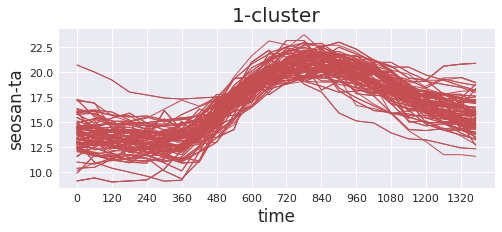

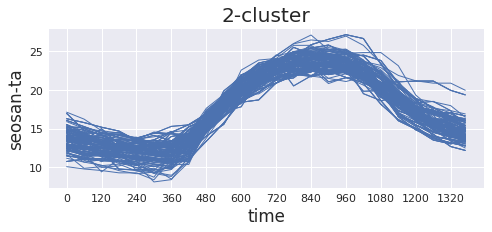

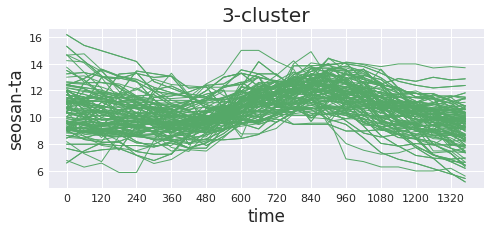

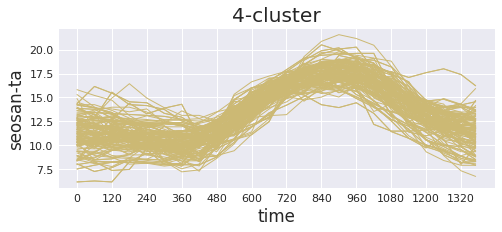

In [97]:
clusterIpoPlot("trend", "seosan-ta", 4)

<Figure size 864x576 with 0 Axes>

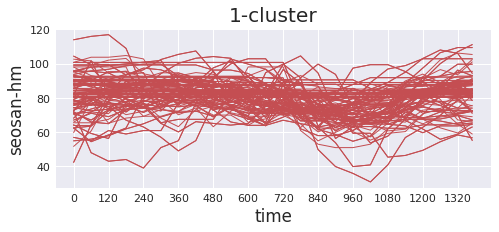

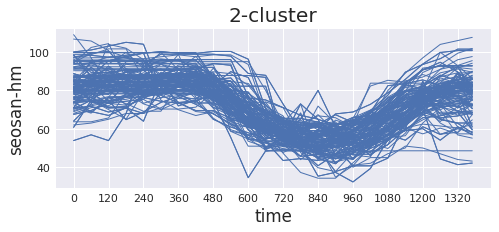

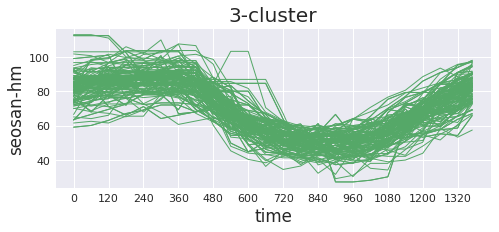

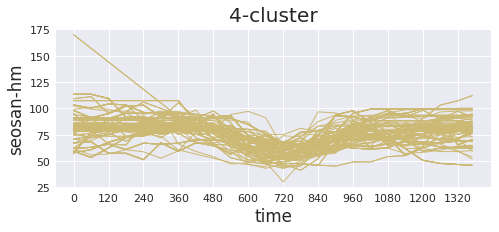

In [98]:
clusterIpoPlot("trend", "seosan-hm", 4)

<Figure size 864x576 with 0 Axes>

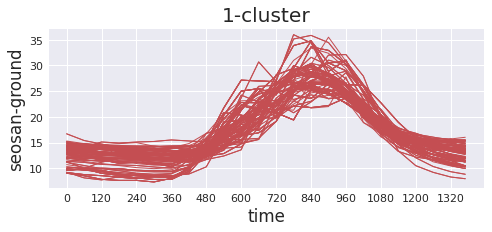

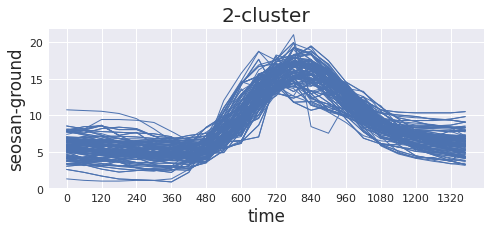

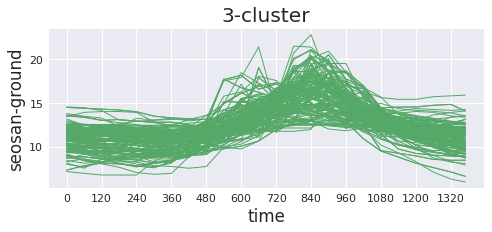

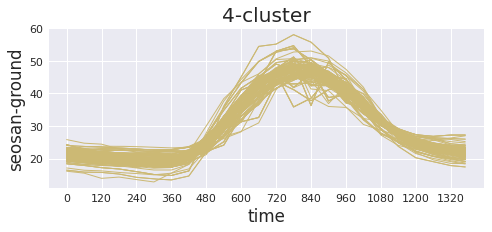

In [99]:
clusterIpoPlot("trend", "seosan-ground", 4)

In [76]:
a = np.array([[1, 2, 3], [4, 100, 6], [7, 8, 9]])
b = np.array([[10, 9, 1]])
c = np.append(a, b, axis=0)
d = np.mean(np.mean(c, axis=0))
e = np.mean(b[0])

b[0]-(e-d)
# d

array([16.66666667, 15.66666667,  7.66666667])

In [58]:
np.zeros((1, 4))

array([[0., 0., 0., 0.]])

In [90]:
# clusterIpoPlot("point", "seosan-ta", 5)

## 3. Point Cluster 분류 확인하기

In [36]:
# data_train_0 = data_train[data_train["seosan-ta-point"] == 0]
# data_train_1 = data_train[data_train["seosan-ta-point"] == 1]
# data_train_2 = data_train[data_train["seosan-ta-point"] == 2]
# data_train_3 = data_train[data_train["seosan-ta-point"] == 3]
# data_train_4 = data_train[data_train["seosan-ta-point"] == 4]

In [37]:
# grouped0 = data_train_0["tem_in"].groupby(data_train_0["month"])
# grouped1 = data_train_1["tem_in"].groupby(data_train_1["month"])
# grouped2 = data_train_2["tem_in"].groupby(data_train_2["month"])
# grouped3 = data_train_3["tem_in"].groupby(data_train_3["month"])
# grouped4 = data_train_4["tem_in"].groupby(data_train_4["month"])

# groupedList = [grouped0, grouped1, grouped2, grouped3, grouped4]
# axisList = [1, 2, 3, 4, 5]
# colorList = ["r", "b", "g", "y", "m"]
# markerColorList = ["m", "g", "b", "r", "y"]

In [38]:
# import matplotlib.pyplot as plt

# plt.suptitle("Point Propability of rows corresponding to the month", fontdict=font1)
# for a, g, c, m in zip(axisList, groupedList, colorList, markerColorList):
#   index = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
#   value = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
#   for mon, val in zip(g.count().index, g.count()):
#     idx = mon-1
#     value[idx] = val/month_count_list[idx]
#     # print(idx, val/month_count_list[idx], value[idx])

#   plt.subplot(2,3,a)
#   plt.subplots_adjust(bottom = 0.1, hspace = 0.4)
#   plt.title(f'{a}-cluster')
#   plt.plot(index, value, c=f'{c}',
#           lw=5, ls="--", marker="o", ms=5, mec="g", mew=5, mfc=f'{m}')
#   plt.xlabel("month")
#   plt.ylabel("probability")
#   plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
#   plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
#   # plt.show()



### 1. ta

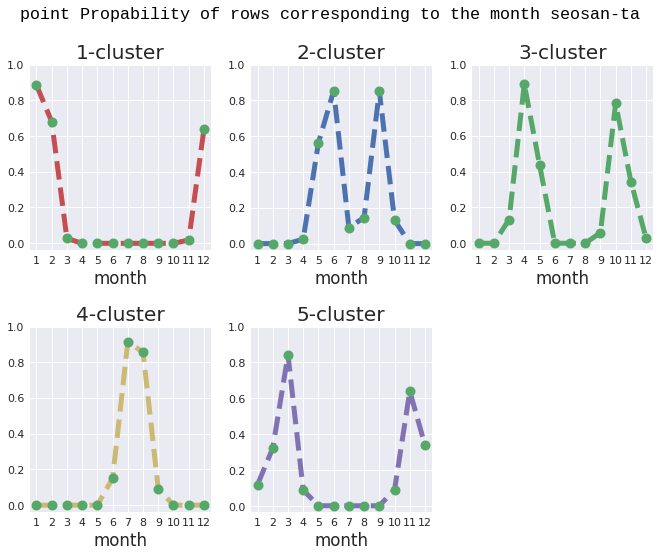

In [240]:
clusterMonthPlot("point", "seosan-ta", 5)

### 2. hm

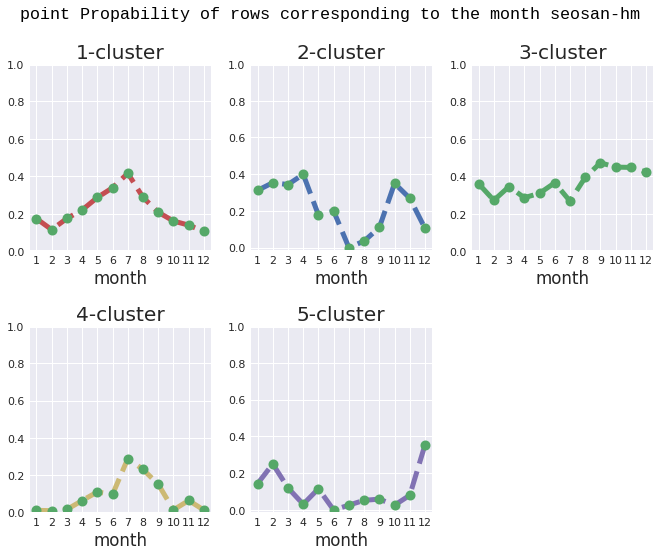

In [241]:
clusterMonthPlot("point", "seosan-hm", 5)

### 3. ground

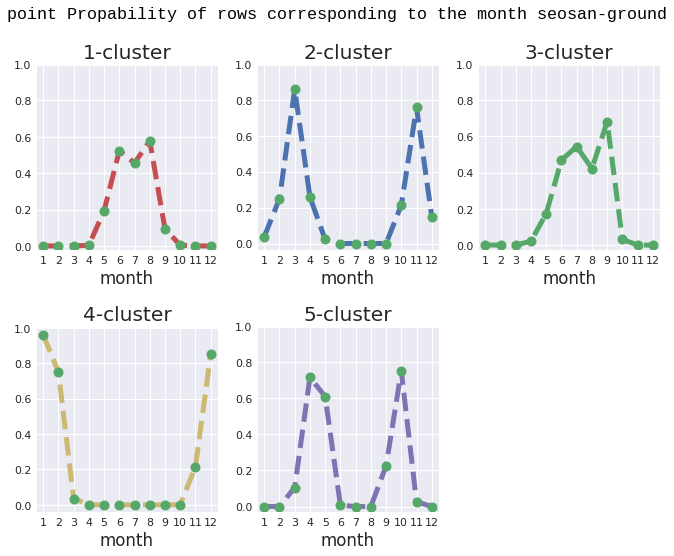

In [242]:
clusterMonthPlot("point", "seosan-ground", 5)

# 공장 In, Out Cluster

해당 코드를 작동 시키기 위해서라면, In, Out 모델을 통해 예측값을 Train data에 입힌 후에 불러와야 한다.

In [243]:
# plant 데이터 
data_train = pd.read_csv(os.path.join(DATA_CONV_PATH, "data_plant_train_trend_point.csv"))

# unnamed: 0 제거
data_train.drop(['Unnamed: 0'], axis='columns', inplace=True)

# date 변수 str -> datetime.date()
data_train['date'] = data_train['date'].apply(lambda x : datetime.strptime(x + " 00:00:00", '%Y-%m-%d %H:%M:%S').date()) 

In [244]:
data_train["month"] = data_train["date"].apply(lambda x: x.month)

In [245]:
data_train

mea_ddhr  plant  loc  ...  hum_in-point  tem_coil-point  month
0       2016-04-01 00:00:00    1.0  1.0  ...             2               1      4
1       2016-04-01 00:00:00    1.0  2.0  ...             2               3      4
2       2016-04-01 00:00:00    1.0  3.0  ...             2               2      4
3       2016-04-01 03:00:00    1.0  1.0  ...             2               1      4
4       2016-04-01 03:00:00    1.0  2.0  ...             2               3      4
...                     ...    ...  ...  ...           ...             ...    ...
350361  2019-03-31 23:30:00    2.0  2.0  ...             3               4      3
350362  2019-03-31 23:30:00    2.0  3.0  ...             2               1      3
350363  2019-03-31 23:40:00    2.0  1.0  ...             4               2      3
350364  2019-03-31 23:40:00    2.0  2.0  ...             3               4      3
350365  2019-03-31 23:40:00    2.0  3.0  ...             2               1      3

[350366 rows x 59 columns]

## Trend

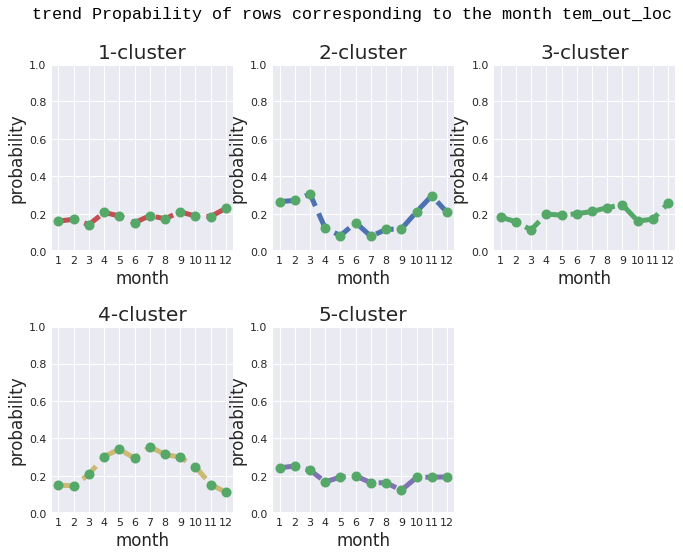

In [103]:
clusterMonthPlot("trend", "tem_out_loc", 5)

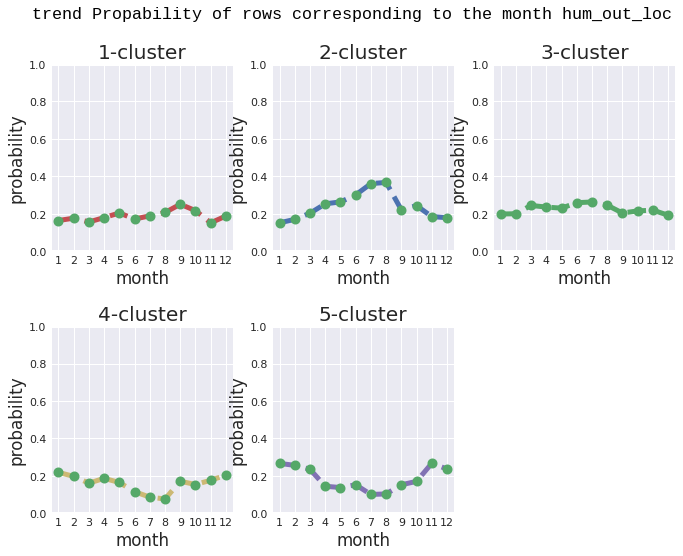

In [104]:
clusterMonthPlot("trend", "hum_out_loc", 5)

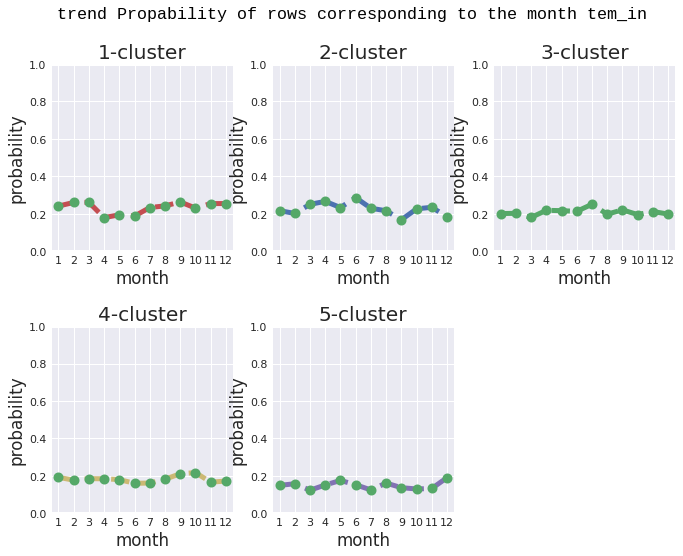

In [105]:
clusterMonthPlot("trend", "tem_in", 5)

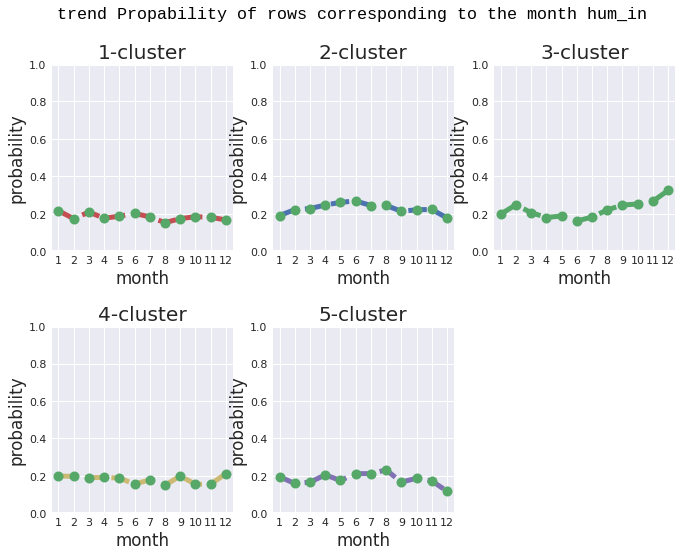

In [106]:
clusterMonthPlot("trend", "hum_in", 5)

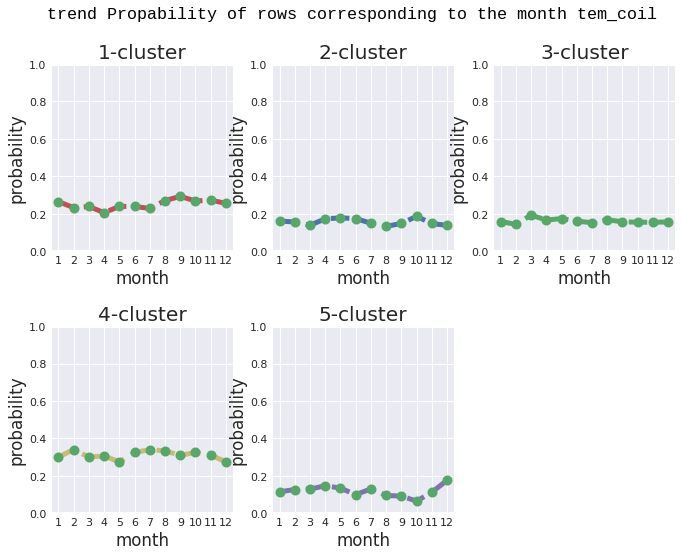

In [107]:
clusterMonthPlot("trend", "tem_coil", 5)

### 날짜별 보간함수 plot

In [209]:
import matplotlib.pyplot as plt
import numpy as np

def clusterTimePlot(df, name, col, k):
  # grouped = data_train[col].groupby(data_train["month"])
  # month_count_list = grouped.count()
  # month_count_list = list(month_count_list)

  width = 2
  if k%2 == 1:
    width = 3

  colorListGlobal = ["r", "b", "g", "y", "m"]
  markerColorListGlobal = ["m", "g", "b", "r", "y"]

  # groupedList = []
  axisList = list(range(1, k+1))
  colorList = colorListGlobal[0:k]
  markerColorList = markerColorListGlobal[0:k]

  plt.suptitle(f'{name} Value fn corresponding to the date {col}', fontdict=font1)
  for a, c, m in zip(axisList, colorList, markerColorList):
    data_cluster = df[df[f'{col}-{name}'] == a-1]
    fig = plt.figure(figsize=(7,15))
    # plt.subplot(2,width,a)
    plt.subplot(k,1,a)
    plt.subplots_adjust(bottom = 0.1, hspace = 0.4)
    plt.title(f'{a}-cluster')
    plt.xlabel("time")
    plt.ylabel(f'{col}')
    # xTicks = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])*60
    xTicks = np.array([0,  2,  4,  6,  8,  10,  12, 14, 16, 18, 20, 22])*60
    plt.xticks(xTicks)
    # plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

    dateList = list(set(data_cluster["date"]))
    
    size = int(len(dateList)/150)
    dateList = dateList[::size]
    start_time = 0
    end_time = 23*60+1
    x = np.arange(start_time, end_time, 60)
    all_y = np.zeros((1, len(x)))

    for date in dateList:
      temp_df = df[df["date"] == date]
      temp_df = temp_df[temp_df["plant"] == 1]
      temp_df = temp_df[temp_df["loc"] == 1]

      temp_y = np.array(temp_df[col])
      temp_y = temp_y.reshape((1, -1))
      all_y = np.append(all_y, temp_y, axis=0)
    
    mean_line = np.mean(all_y, axis=0)

    for i in range(1, all_y.shape[0]):
      ylist = all_y[i]
      ylist_mean = np.mean(ylist)
      mean_line_mean = np.mean(mean_line)
      diff = ylist_mean - mean_line_mean

      y = ylist-diff

      plt.plot(x, y, c=f'{c}', lw=1, mec="g")

#### 데이터 불러오기

In [202]:
# plant 데이터 
data_train = pd.read_csv(os.path.join(DATA_CONV_PATH, "data_all_time_out_in.csv"))

# unnamed: 0 제거
data_train.drop(['Unnamed: 0'], axis='columns', inplace=True)

# date 변수 str -> datetime.date()
data_train['date'] = data_train['date'].apply(lambda x : datetime.strptime(x + " 00:00:00", '%Y-%m-%d %H:%M:%S').date()) 

In [203]:
# plant 데이터 
data_cluster = pd.read_csv(os.path.join(DATA_CONV_PATH, "date_trend_point.csv"))

# unnamed: 0 제거
data_cluster.drop(['Unnamed: 0'], axis='columns', inplace=True)

# date 변수 str -> datetime.date()
data_cluster['date'] = data_cluster['date'].apply(lambda x : datetime.strptime(x + " 00:00:00", '%Y-%m-%d %H:%M:%S').date()) 

In [204]:
data = pd.merge(data_train, data_cluster, how="left", on=["date", "plant", "loc"])


In [205]:
data

date  plant  loc  ...  tem_in-point  hum_in-point  tem_coil-point
0       2016-04-01      1    1  ...             2             4               1
1       2016-04-01      1    1  ...             2             4               1
2       2016-04-01      1    1  ...             2             4               1
3       2016-04-01      1    1  ...             2             4               1
4       2016-04-01      1    1  ...             2             4               1
...            ...    ...  ...  ...           ...           ...             ...
210379  2020-03-31      2    3  ...             1             2               1
210380  2020-03-31      2    3  ...             1             2               1
210381  2020-03-31      2    3  ...             1             2               1
210382  2020-03-31      2    3  ...             1             2               1
210383  2020-03-31      2    3  ...             1             2               1

[210384 rows x 56 columns]

<Figure size 864x576 with 0 Axes>

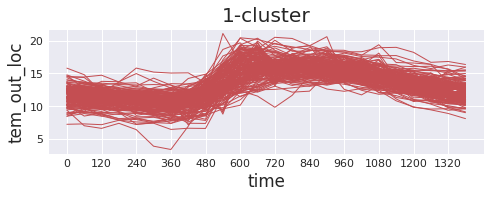

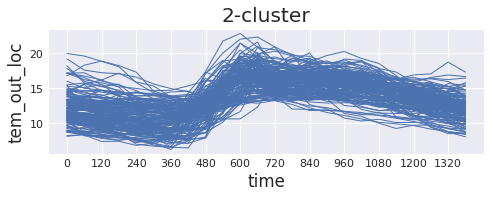

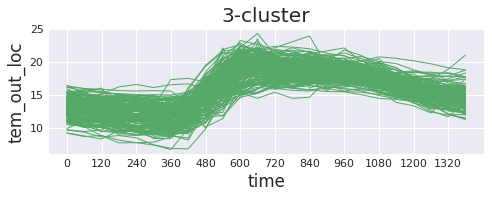

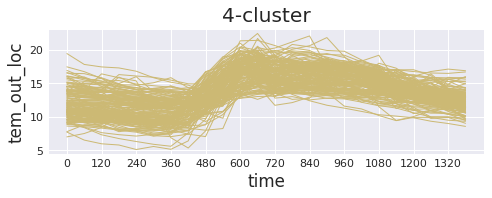

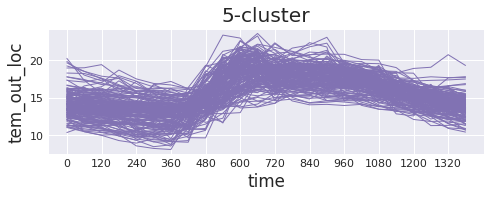

In [210]:
clusterTimePlot(data, "trend", "tem_out_loc", 5)

<Figure size 864x576 with 0 Axes>

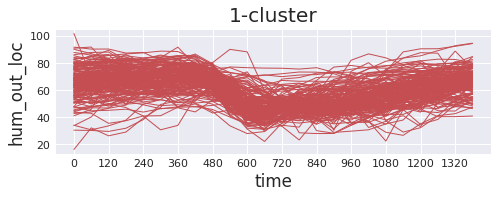

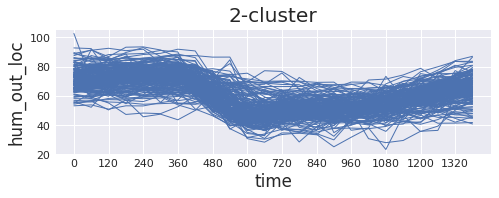

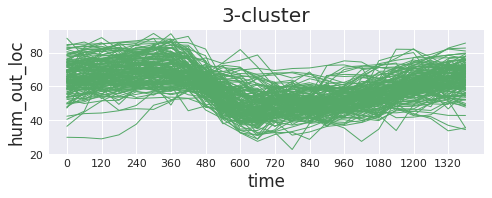

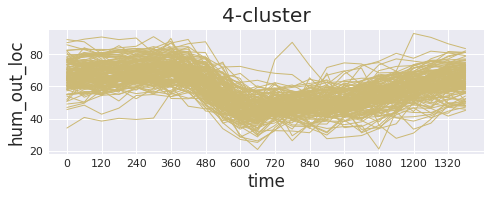

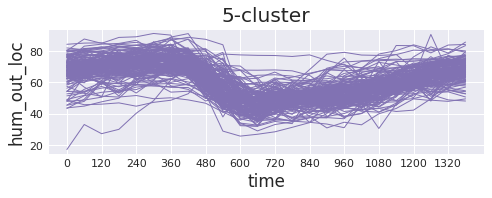

In [211]:
clusterTimePlot(data, "trend", "hum_out_loc", 5)

<Figure size 864x576 with 0 Axes>

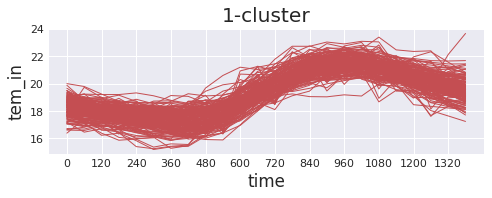

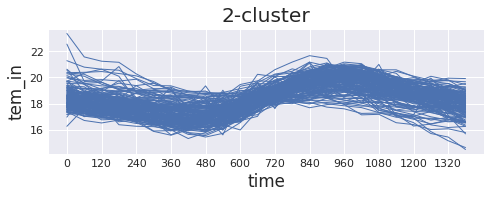

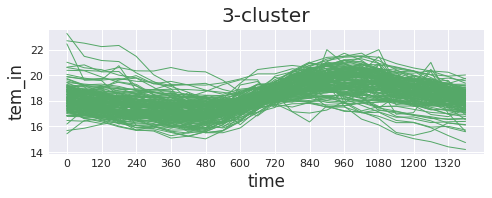

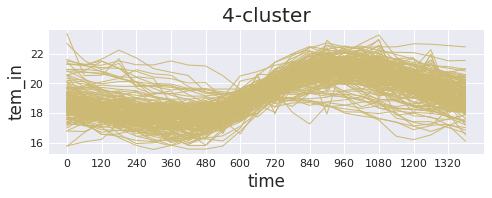

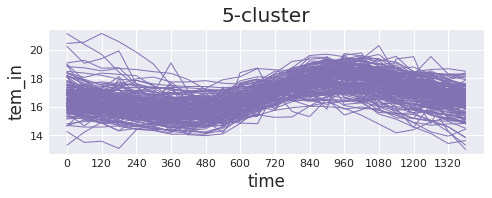

In [212]:
clusterTimePlot(data, "trend", "tem_in", 5)

<Figure size 864x576 with 0 Axes>

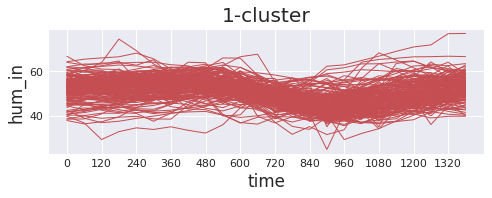

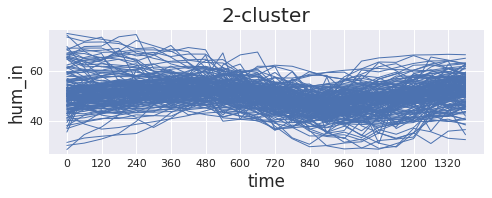

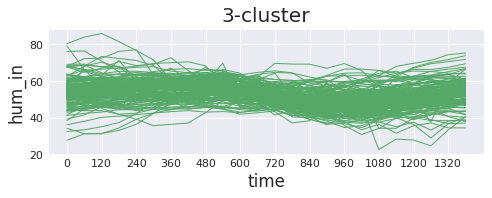

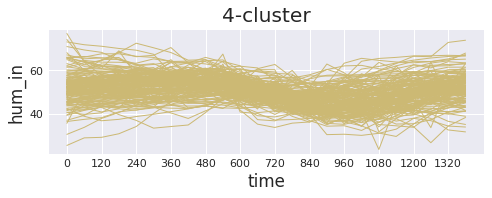

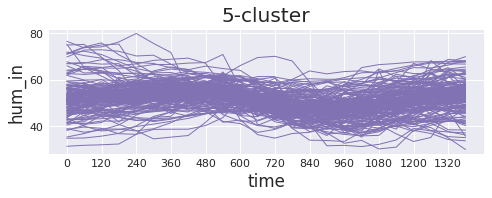

In [213]:
clusterTimePlot(data, "trend", "hum_in", 5)

<Figure size 864x576 with 0 Axes>

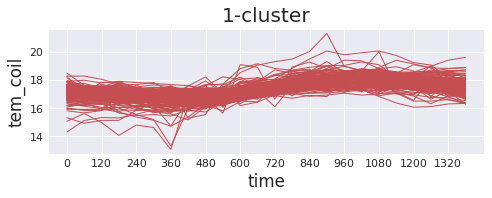

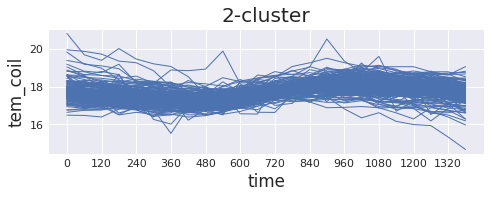

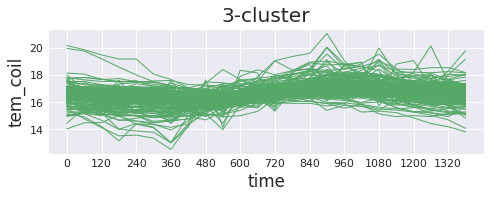

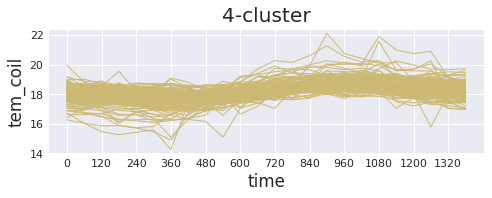

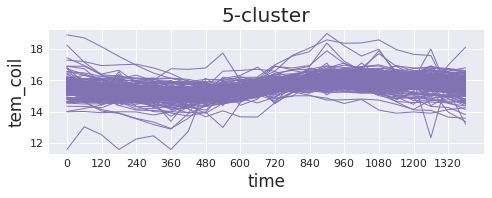

In [214]:
clusterTimePlot(data, "trend", "tem_coil", 5)

## Point

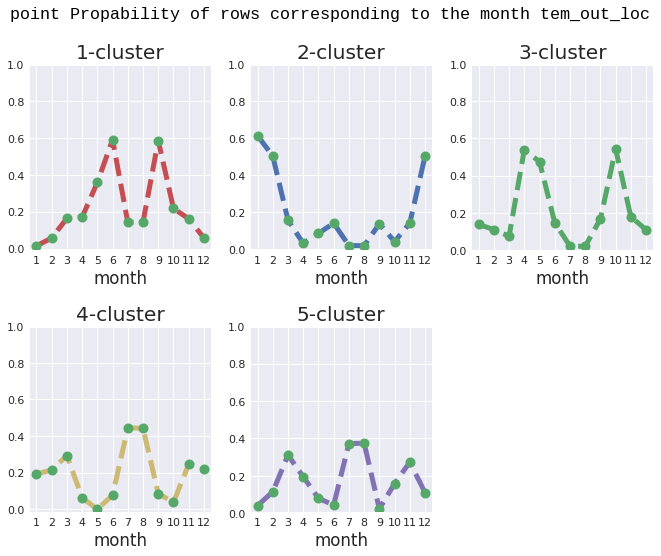

In [246]:
clusterMonthPlot("point", "tem_out_loc", 5)

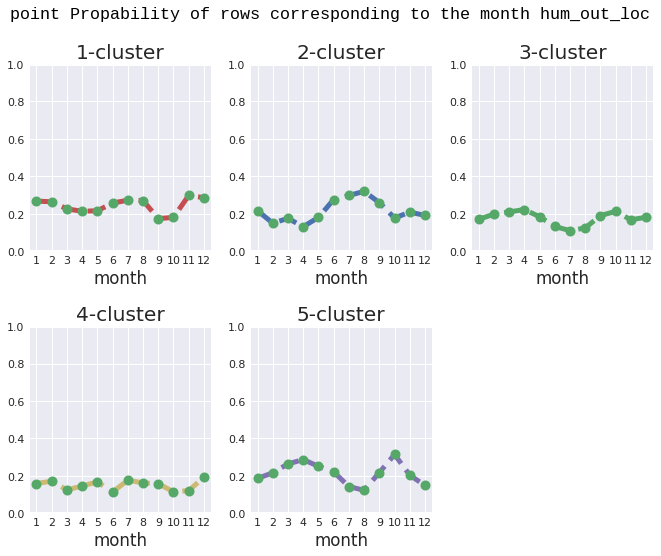

In [247]:
clusterMonthPlot("point", "hum_out_loc", 5)

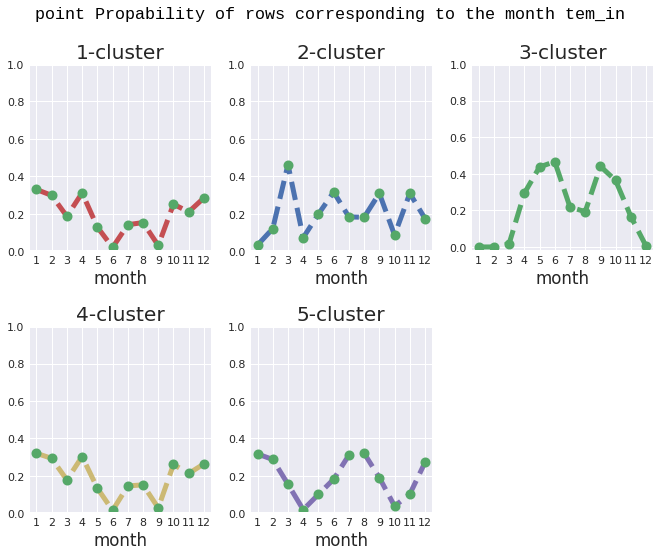

In [248]:
clusterMonthPlot("point", "tem_in", 5)

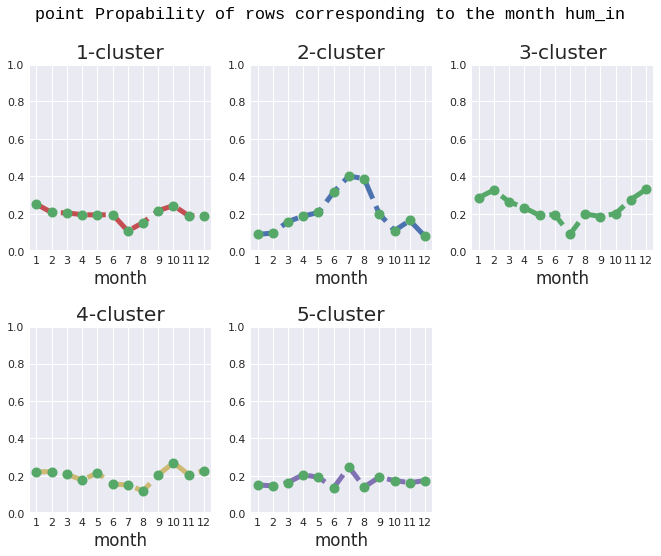

In [249]:
clusterMonthPlot("point", "hum_in", 5)

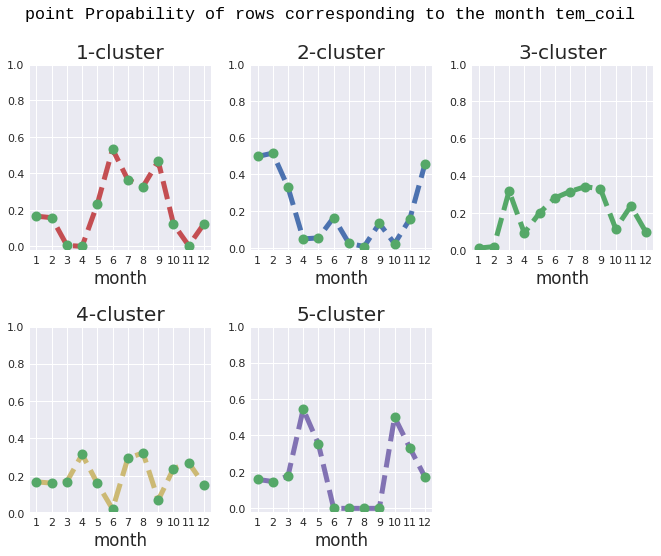

In [250]:
clusterMonthPlot("point", "tem_coil", 5)